# Double opponency

This notebook plots the distribution of double opponent cells in different layers of our model as a function of bottleneck size. It corresponds to Figure 2(c) in the paper.

**Note**: The easiest way to use this is as a colab notebook, which allows you to dive in with no setup.

## Load Dependencies - Colab Only

In [ ]:
from os.path import exists
if not exists('opponency.zip'):
    !wget -O opponency.zip https://github.com/ecs-vlc/opponency/archive/master.zip
    !unzip -qq opponency.zip
    !mv opponency-master/* ./
    !rm -r opponency-master

## Generate Plots

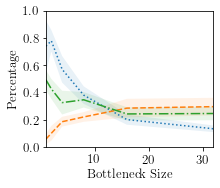

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager
rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':13})
rc('text', usetex=True)
import pandas as pd
import numpy as np

from statistics import load
# import seaborn as sns
# sns.set()

spatial = pd.read_pickle('logs/spatial.pd')
spectral = pd.read_pickle('logs/devalois.pd')

plt.figure(figsize=(3,2.5))
opps = load.double(spectral, spatial)

retina2 = opps[opps['layer'] == 'retina_relu2']
ventral0 = opps[opps['layer'] == 'ventral_relu0']
ventral1 = opps[opps['layer'] == 'ventral_relu1']

plt.plot(retina2['n_bn'], retina2['mean_rel_amount'], label='Retina 2', linestyle=':')
plt.fill_between(
    retina2['n_bn'],
    retina2['mean_rel_amount'] + retina2['std_rel_amount'],
    retina2['mean_rel_amount'] - retina2['std_rel_amount'],
    alpha=0.1
)

plt.plot(ventral0['n_bn'], ventral0['mean_rel_amount'], label='Ventral 1', linestyle='--')
plt.fill_between(
    ventral0['n_bn'],
    ventral0['mean_rel_amount'] + ventral0['std_rel_amount'],
    ventral0['mean_rel_amount'] - ventral0['std_rel_amount'],
    alpha=0.1
)

plt.plot(ventral1['n_bn'], ventral1['mean_rel_amount'], label='Ventral 2', linestyle='-.')
plt.fill_between(
    ventral1['n_bn'],
    ventral1['mean_rel_amount'] + ventral1['std_rel_amount'],
    ventral1['mean_rel_amount'] - ventral1['std_rel_amount'],
    alpha=0.1
)

plt.xlim(1, 32)
plt.ylim(0, 1)

plt.xlabel('Bottleneck Size')
plt.ylabel('Percentage')
plt.savefig('figures/double_opponent.pdf', bbox_inches='tight')

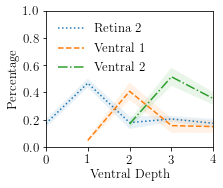

In [4]:
spatial = pd.read_pickle('logs/spatial.pd')
spectral = pd.read_pickle('logs/devalois.pd')

plt.figure(figsize=(3,2.5))
opps = load.double(spectral, spatial, groupby='d_vvs')

retina2 = opps[opps['layer'] == 'retina_relu2']
ventral0 = opps[opps['layer'] == 'ventral_relu0']
ventral1 = opps[opps['layer'] == 'ventral_relu1']

plt.plot(retina2['d_vvs'], retina2['mean_rel_amount'], label='Retina 2', linestyle=':')
plt.fill_between(
    retina2['d_vvs'],
    retina2['mean_rel_amount'] + retina2['std_rel_amount'],
    retina2['mean_rel_amount'] - retina2['std_rel_amount'],
    alpha=0.1
)

plt.plot(ventral0['d_vvs'], ventral0['mean_rel_amount'], label='Ventral 1', linestyle='--')
plt.fill_between(
    ventral0['d_vvs'],
    ventral0['mean_rel_amount'] + ventral0['std_rel_amount'],
    ventral0['mean_rel_amount'] - ventral0['std_rel_amount'],
    alpha=0.1
)

plt.plot(ventral1['d_vvs'], ventral1['mean_rel_amount'], label='Ventral 2', linestyle='-.')
plt.fill_between(
    ventral1['d_vvs'],
    ventral1['mean_rel_amount'] + ventral1['std_rel_amount'],
    ventral1['mean_rel_amount'] - ventral1['std_rel_amount'],
    alpha=0.1
)

plt.xlim(0, 4)
plt.ylim(0, 1)
plt.legend(frameon=False)
plt.xlabel('Ventral Depth')
plt.ylabel('Percentage')
plt.savefig('figures/double_opponent_depth.pdf', bbox_inches='tight')